In [7]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import yfinance.shared as shared
import matplotlib.pyplot as plt
from datetime import datetime
import concurrent.futures 
import random

In [11]:

import numpy as np 
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [13]:
html_data=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies').text
beautiful_soup=BeautifulSoup(html_data, "html.parser")
tables = beautiful_soup.find_all('table')
len(tables)

2

In [18]:
data = []

for row in tables[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:  # check if col is not empty
        Symbol = col[0].text.strip().replace('\n','')
        Security = col[1].text.strip().replace('\n','')
        Sector = col[2].text.strip().replace('\n','')
        Sub_Industry = col[3].text.strip().replace('\n','')
        Headquarters_Location = col[4].text.strip().replace('\n','')
        Date_first = col[5].text.strip().replace('\n','')
        CIK = col[6].text.strip().replace('\n','')
        Founded = col[7].text.strip().replace('\n','')
        data.append({"Symbol": Symbol, "Security": Security, "Sector": Sector, "Sub-Industry": Sub_Industry,
                     "Headquarters Location": Headquarters_Location, "Date first added": Date_first, "CIK": CIK, "Founded": Founded})

# Convert list of dictionaries to DataFrame
sp500_info = pd.DataFrame(data)

In [19]:
sp500_info.head()


,Symbol,Security,Sector,Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [21]:
sp_tickers = sp500_info[['Symbol', 'Security', 'Sector']]
sp_tickers.head()

,Symbol,Security,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


In [22]:
sp_tickers.columns = ['ticker', 'security_name', 'sector']

In [23]:
#get ticker from csv file
tickers = sp_tickers

#set start and end date
start_date = '2018-11-01'
end_date = '2023-12-31'
#create the range for dates
dates = pd.date_range(start_date, end_date)


In [24]:
#Remove Duplicate Tickers 
# https://www.w3schools.com/python/python_howto_remove_duplicates.asp
no_duplicate_tickers = list(dict.fromkeys(tickers['ticker']))


In [25]:
#get_data consumes the original ticker list produces a new list where the delisted stocks are filtered out
def get_data (ticker_list):
    filter_list = []
    no_error = []
    #get data from yfinance
    data = yf.download(ticker_list, start=start_date, end=end_date)
    #find stocks that have errors or delisted
    errors= list(shared._ERRORS.keys())
    #find tickers that does not have errors
    for ticker in ticker_list:
        if ticker not in errors:
            no_error.append(ticker)
    #create the new list using append, so the list stands by itself
    for t in no_error:
        filter_list.append(t)
    return filter_list

#get a filtered list called filer_list
no_delisted_list=get_data(no_duplicate_tickers)

#to check no_delisted_list -> uncomment
#no_delisted_list

[*********************100%%**********************]  503 of 503 completed

4 Failed downloads:
['GEV', 'SOLV']: Exception("%ticker%: Data doesn't exist for startDate = 1541044800, endDate = 1703998800")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-11-01 -> 2023-12-31)')


In [36]:
# NEW CODE

#consumes a semi-filtered listed and further filter it with currency
def filter_currency(ticker):
    #set j to count the list
    company=yf.Ticker(ticker)
    company_info=company.info
    try: 
        if company_info['currency'] != 'USD':
            print(ticker + " was removed because it is not in USD")
            return ticker
        #added to filter out etfs and mutual funds
        elif 'holdings' in company_info:
            print(ticker + " was removed because it is not a stock.")
            return ticker
        return 'N/A'
    except:
        print(ticker + " may not have enough information")
        return ticker

#Creating list for valid filters
invalid = []

# Use threading to filter our ticker_list
with concurrent.futures.ThreadPoolExecutor() as executor:
    
    #Applying stock_filter on every element of ticker_list
    results = executor.map(filter_currency, no_delisted_list)
    
    #Adding the results to the valid_list
    for result in results:
        invalid.append(result)



In [37]:
#use for loop to remove all values that are invalid in the no_delisted_list
i=0
for ticker in no_delisted_list:
    for invalid_stock in invalid:
        if ticker == invalid_stock:
            no_delisted_list.pop(i)
    i=i+1
    
no_delisted_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 

In [38]:

#threshold_volume for monthly average
threshold_volume = 200000

#temporary start and end for checking volume
temp_start = '2022-01-01'
temp_end = '2022-12-31'


#consumes a semi-filtered listed and further filter it with volume 
def filter_volume(ticker):
    try:
        #set j to count the list
        company=yf.Ticker(ticker)
        company_info=company.info
        stock = company.history(start = temp_start, end=temp_end)
        df_stock = pd.DataFrame({'Volume':stock.Volume})
        df_stock.reset_index(inplace=True)

        #group into dataframes by month
        g = df_stock.groupby(pd.Grouper(key='Date', freq='M'))
        # groups to a list of dataframes 
        dfs = [group for _,group in g]

        monthlyVolume = []
        for i in range (len(dfs)-1):
            if ((len(dfs[i]))< 20):
                dfs.pop(i)
        for k in range (len(dfs)):
            monthlyVolume.append(dfs[k]['Volume'].sum())

        if np.mean(monthlyVolume) < threshold_volume:
            print(ticker + " was removed because it's volume does not meet the threshold")
            return ticker
        return 'N/A'
    except:
        print(ticker + " was removed because does not have appropriate information")
        return ticker

#Creating list for valid filters
invalid = []

# Use threading to filter our ticker_list
with concurrent.futures.ThreadPoolExecutor() as executor:
    
    #Applying stock_filter on every element of ticker_list
    results = executor.map(filter_volume, no_delisted_list)
    
    #Adding the results to the valid_list
    for result in results:
        invalid.append(result)



KVUE: Data doesn't exist for startDate = 1641013200, endDate = 1672462800


KVUE was removed because does not have appropriate information


VLTO: Data doesn't exist for startDate = 1641013200, endDate = 1672462800


VLTO was removed because does not have appropriate information


In [39]:
#use for loop to remove all values that are invalid in the no_delisted_list
i=0
for ticker in no_delisted_list:
    for invalid_stock in invalid:
        if ticker == invalid_stock:
            no_delisted_list.pop(i)
    i=i+1

In [40]:
fully_filtered_list=no_delisted_list

### Here is the fully filtered list displayed:


In [41]:
print('List includes tickers: ')
fully_filtered_list

List includes tickers: 


['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 

Step 2: Calculate Beta

In [42]:

def find_beta_helper(stockname, market):
    
    Stock = yf.Ticker(stockname)
    MarketIndex = yf.Ticker(market)
    
    Stock_hist = Stock.history(start=start_date, end=end_date)
    MarketIndex_hist = MarketIndex.history(start=start_date, end=end_date)
    
    prices = pd.DataFrame()
    prices[Stock] = Stock_hist['Close']
    prices[MarketIndex] = MarketIndex_hist['Close']
    
    weekly_returns=prices.resample('W').ffill().pct_change()
    weekly_returns.drop(index = weekly_returns.index[0], inplace=True)
    
    MarketVar=weekly_returns[MarketIndex].var()
    Beta=abs(weekly_returns.cov()/MarketVar)
    
    return Beta.iat[0,1]

In [43]:

def find_beta(ticker_df):
    ticker_df['beta'] = ''
    for i in ticker_df.index:
        ticker_df.loc[ticker_df['index']==i,'beta'] = find_beta_helper(ticker_df[ticker_df['index'] == i]['ticker'].item(), '^GSPC')
    return ticker_df

Calculate Standard Deviation


In [44]:
# data_storage(stock_name) consumes a stock name and produces the weekly stock price within given time frame
def data_storage(stock_name):
    data_all = pd.DataFrame({}) 
    data_all[stock_name] = yf.Ticker(stock_name).history(start=start_date, end=end_date, interval = "1wk") ['Close']
    data_all.reset_index(inplace=True)
    data_all.dropna()
    return data_all

In [45]:
def stock_worth_return(stock):
    
    # create a new dataframe for calculation
    dataframe = data_storage(stock)
    stock_worth = pd.DataFrame({}) 
    stock_worth['Date'] = dataframe['Date']
    temp=0
    
    # find the weekly percentage change of the sotck within the time period
    for k in stock_worth.Date:
        month_sum = 0
        month_sum = dataframe[dataframe['Date'] == k][stock].item()
        stock_worth.loc[stock_worth['Date'] == k, stock] = month_sum
        if (temp == 0):
            stock_worth.loc[stock_worth['Date'] == k, stock + ' % return'] = 1
        else:
            stock_worth.loc[stock_worth['Date'] == k, stock + ' % return'] = month_sum / temp 
        temp = month_sum
    
    # calculate the std value of the stock based on the dataframe of its historical price
    stdvalue = stock_worth[stock + ' % return'].std()
    
    return stdvalue

In [51]:

def find_std(ticker_df):
    ticker_df['std'] = ''
    for i in ticker_df.index:
        try:
            ticker_df.loc[ticker_df['index']==i,'std'] = stock_worth_return(ticker_df[ticker_df['index'] == i]['ticker'].item())
        except Exception:
            ticker_df.loc[ticker_df['index']==i,'std'] = None
    ticker_df.dropna(inplace = True)
    return ticker_df


Strategy:  to rank the tickers based on their beta value and standard deviation using the function “ranking“. After ranking them, the sum of their beta rank and standard deviation rank was taken and put into another column called “sum ranking”. From there, the tickers were ranked again and sorted in ascending order in the dataframe called “ranked_stats”. The final rankings can be found in the last column called “final ranking” and the top 25 tickers were chosen from the dataframe. 


In [52]:
# create a function that consumes a dataframe of tickers, std value and beta value. Then it produces the 
# ranking of std, beta and overall
def ranking(ticker_df):
    
    ticker_df['std ranking'] = ticker_df['std'].rank(method='max')
    ticker_df['beta ranking'] = ticker_df['beta'].rank(method='max')
    ticker_df['sum ranking'] = ticker_df['std ranking'] + ticker_df['beta ranking']
    ticker_df['final ranking'] = ticker_df['sum ranking'].rank(method='max')
          
    return ticker_df
    

=using the functions explained above, we now find the appropriate stats for each ticker

we find the beta, std and ranking in this code block


In [53]:
#might take around 3+ minutes to run

# store the list into a dataframe
tickerSearch = pd.DataFrame({'ticker':fully_filtered_list})
tickerSearch.reset_index(inplace=True)

# calculate the beta value of the dataframe and store the values into the dataframe
ticker_stats=find_beta(tickerSearch)

# create a new dataframe that has a column for the std value of each stock
ticker_stats=find_std(tickerSearch)

# create a new dataframe that ranks the std, beta and overall
ranked_stats=ranking(ticker_stats)

### HIGH or LOW risk?


In [54]:
risk = 'low'
#risk = 'high'

In [55]:

if risk == 'low':
    original_stats=ranked_stats.sort_values(by=['final ranking'])
elif risk == 'high':
    original_stats = ranked_stats.sort_values(by=['final ranking'], ascending=False)

original_stats.head()

,index,ticker,beta,std,std ranking,beta ranking,sum ranking,final ranking
234,234,HRL,0.212896,0.028947,8.0,1.0,9.0,1.0
214,214,GIS,0.216941,0.028966,9.0,2.0,11.0,2.0
466,466,VZ,0.424368,0.027362,4.0,11.0,15.0,3.0
265,265,JNJ,0.501572,0.026408,2.0,14.0,16.0,4.0
117,117,CL,0.509927,0.026052,1.0,17.0,18.0,5.0


In [56]:
original_stats.tail()

,index,ticker,beta,std,std ranking,beta ranking,sum ranking,final ranking
169,169,ENPH,1.768131,0.107356,495.0,484.0,979.0,493.0
86,86,CCL,2.127029,0.094502,490.0,494.0,984.0,494.0
404,404,RCL,2.253967,0.096577,491.0,496.0,987.0,495.0
342,342,NCLH,2.202434,0.101383,493.0,495.0,988.0,496.0
80,80,CZR,3.048956,0.114998,497.0,497.0,994.0,497.0


In [57]:
#sort ranks to find the top 25 
#set the maximum number of stocks we will invest in
max_invest = 15
if risk == 'low':
    ranked_stats=ranked_stats.sort_values(by=['final ranking']).head(max_invest)
elif risk == 'high':
    ranked_stats = ranked_stats.sort_values(by=['final ranking'], ascending=False).head(max_invest)


    
ranked_stats = ranked_stats.reset_index(drop=True)
ranked_stats = ranked_stats.reset_index()
ranked_stats.drop('index', inplace=True, axis=1)
ranked_stats.reset_index(inplace=True)
  

In [66]:
ranked_stats

,index,level_0,ticker,beta,std,std ranking,beta ranking,sum ranking,final ranking
0,0,0,HRL,0.212896,0.028947,8.0,1.0,9.0,1.0
1,1,1,GIS,0.216941,0.028966,9.0,2.0,11.0,2.0
2,2,2,VZ,0.424368,0.027362,4.0,11.0,15.0,3.0
3,3,3,JNJ,0.501572,0.026408,2.0,14.0,16.0,4.0
4,4,4,CL,0.509927,0.026052,1.0,17.0,18.0,5.0
5,5,5,K,0.398708,0.029221,12.0,9.0,21.0,7.0
6,6,6,SJM,0.247687,0.030074,17.0,4.0,21.0,7.0
7,7,7,CHD,0.336048,0.030756,18.0,6.0,24.0,8.0
8,8,8,WMT,0.467442,0.029495,14.0,12.0,26.0,11.0
9,9,9,KMB,0.498846,0.029273,13.0,13.0,26.0,11.0


In [58]:
final = ranked_stats[['ticker']]
final.reset_index(inplace=True)

# put the top 25 stocks in reverse order
final = final.sort_values(by=['index'], ascending=False)

# generate a new dataframe for easier calculation and adjust the index
newfinal = final[['ticker']]
newfinal = newfinal.reset_index(drop=True)
newfinal.reset_index(inplace=True)

In [68]:
newfinal

,index,ticker
0,0,ED
1,1,HSY
2,2,PG
3,3,MRK
4,4,KDP
5,5,KMB
6,6,WMT
7,7,CHD
8,8,SJM
9,9,K


By definition, correlation, in relation to portfolio risk, is a measurement of how closely related the movements in returns are between securities.


In [74]:
# create a find_correlation definiton that consumes a list of stocks and create a 
# correlation matrix of all stocks
def find_correlation(ticker_df):
    
    # create a list and dataframe for runnign this definition
    ticker_lst = []
    stock_df = pd.DataFrame({})
    
    for i in range(len(ticker_df.index)):
        ticker_lst.append(ticker_df[ticker_df['index'] == i]['ticker'].item())
        
    for m in range(len(ticker_df)):
        temp = yf.Ticker(ticker_lst[m]).history(start=start_date, end=end_date, interval = "1wk") ['Close']
        stock_df[ticker_lst[m]] = temp.pct_change() * 100
    
    stock_df.reset_index(drop = True, inplace=True)
    stock_df.dropna()
    # print(stock_df)
    # create a list and dataframe for runnign this definition
    corrvalue = stock_df.corr()
    return corrvalue

In [75]:
corrtable = find_correlation(newfinal)
corrtable

,ED,HSY,PG,MRK,KDP,KMB,WMT,CHD,SJM,K,CL,JNJ,VZ,GIS,HRL
ED,1.000000,0.547572,0.542759,0.313191,0.300365,0.484345,0.321924,0.272179,0.290770,0.395426,0.583181,0.477761,0.447859,0.364176,0.295238
HSY,0.547572,1.000000,0.569496,0.386765,0.387916,0.585994,0.374423,0.409315,0.445113,0.550060,0.598572,0.505397,0.343470,0.448308,0.424646
PG,0.542759,0.569496,1.000000,0.356979,0.358973,0.721810,0.504900,0.580921,0.430680,0.535241,0.761289,0.538032,0.440584,0.453302,0.398752
MRK,0.313191,0.386765,0.356979,1.000000,0.283107,0.375445,0.274826,0.348053,0.281424,0.365241,0.376479,0.551186,0.383763,0.357735,0.273773
KDP,0.300365,0.387916,0.358973,0.283107,1.000000,0.320883,0.348206,0.304196,0.345406,0.322310,0.375301,0.333596,0.274104,0.291977,0.316959
KMB,0.484345,0.585994,0.721810,0.375445,0.320883,1.000000,0.432890,0.601305,0.470833,0.540555,0.729522,0.498384,0.405391,0.513285,0.378329
WMT,0.321924,0.374423,0.504900,0.274826,0.348206,0.432890,1.000000,0.476757,0.454095,0.376100,0.446352,0.426822,0.303672,0.475986,0.392772
CHD,0.272179,0.409315,0.580921,0.348053,0.304196,0.601305,0.476757,1.000000,0.477396,0.375684,0.591134,0.348240,0.344404,0.444027,0.413248
SJM,0.290770,0.445113,0.430680,0.281424,0.345406,0.470833,0.454095,0.477396,1.000000,0.569896,0.450320,0.360845,0.358036,0.658964,0.478034
K,0.395426,0.550060,0.535241,0.365241,0.322310,0.540555,0.376100,0.375684,0.569896,1.000000,0.515479,0.441487,0.426960,0.619719,0.449326


Adjusting portfolio weightings for diversified portfolio 
After choosing the top 25 safest stocks (or less if originally given less than 25 tickers), we calculated the average correlation and divided it by the sum of the average correlation for each of the stocks. Instead of having an equally weighted portfolio, we decided to give stocks that are less correlated with the other stocks in the portfolio more weighting so if the portfolio as a whole moves up or down, the stock that is less correlated to the entire portfolio would be able to counteract the fluctuations overall. In order to assign the least amount of weightings to the higher correlated stocks and more weightings to less correlated stocks, we have to manipulate the data.

Since the correlation statistics range from 1 to -1, with 1 being most closely correlated and -1 being least correlated, if we multiply the correlation variable by -1 (or take the negative of the correlation), this would flip the stocks that are most correlated with the stocks that are least correlated. Then if we add 1 to these values, we would shift the range of the correlation data so 2 is the least correlated and 0 being most correlated. This is helpful for our weighting calculation, since we want more weighting for stocks with a lower average correlation, which would be closer to two, as this would provide a larger value over the sum of all the average correlations in the portfolio, which calculates larger percentage.



In [76]:
# generate the average of all the correlation value of a stock, and fill stocks that have a NaN value
average = pd.DataFrame(corrtable.mean(axis=0))
average=average.fillna(method='ffill')

# name the column to be the mean of all the stock's correlation value and modify it for weighting
average.columns = ['Mean']
average['Mean'] = (-average['Mean']) + 1

# find the sum of all the means of the stocks
sum_mean = average['Mean'].sum()

# calculate the weight based on the mean of each stock and overall sum of mean
average['Weight'] = average['Mean'] / sum_mean

# calculate value by multiplying the weight with the total amount of cash
average['Value'] = average['Weight'] * 500000

# calculate value by multiplying the weight with the total amount of cash
average.reset_index(inplace=True)
average=average.rename(columns={'index': 'Ticker'})
average.reset_index(inplace=True)
average = average.sort_values(by=['index'], ascending=False)

/var/folders/xp/pns_c2r97xn7m5lw5_1_d9q00000gn/T/ipykernel_37869/4188036452.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  average=average.fillna(method='ffill')


In [77]:
# check if the weighting of a stock is below 2% or above 25%, if so, then adjust the change

for i in range(len(average.index)):
    diff = 0
    
    # if the stock has wieghting below 0.02 then adjust it to a 0.02 weighting
    if average[average['index'] == i]['Weight'].item() < 0.02:
        diff = 0.02 - average[average['index'] == i]['Weight'].item()
        average.loc[average['index']==i,'Weight'] = 0.02
    
    # if the stock has wieghting above 0.25 then adjust it to a 0.25 weighting
    elif average[average['index'] == i]['Weight'].item() > 0.25:
        diff = average[average['index'] == i]['Weight'].item() - 0.25
        average.loc[average['index']==i,'Weight'] = 0.25
    
    # distribute the added or subtracted value equally to all stocks
    average['Weight'] = average['Weight'] + diff/len(average.index)

In [78]:
# find the current stock price for all top 25 stocks and store them into dataframe average
for m in range(len(average.index)):
    day_price=yf.Ticker(average[average['index'] == m]['Ticker'].item()).history(start='2022-11-25', end='2022-11-26', interval = "1d")['Close'].item()
    average.loc[average['index'] == m, 'Price'] = day_price

# calculate the number of shares 
average['Shares'] = average['Value'] / average['Price']

In [79]:
average.head()

,index,Ticker,Mean,Weight,Value,Price,Shares
14,14,HRL,0.575292,0.072370,36185.045401,47.222980,766.259245
13,13,GIS,0.508098,0.063917,31958.631369,79.127945,403.885522
12,12,VZ,0.578003,0.072711,36355.558595,35.177662,1033.484224
11,11,JNJ,0.516858,0.065019,32509.582027,170.723770,190.422119
10,10,CL,0.445034,0.055984,27992.014336,73.962196,378.463806


In [80]:
# Calculate the sum of the weights in average
average['Weight'].sum()

1.0

## Analysis

In [93]:
#for simplicity and easier visiaulization, the graphs will only include data starting from 2022 Jan to November for 11 months
graph_start='2023-01-01'
graph_end='2023-12-31'

final_stats=ranked_stats


#make_price consumes a list of tickers and find the prices of every ticker in the list
def make_price (ticker_list):
    df_stock = pd.DataFrame()
    for ticker in ticker_list:
        company=yf.Ticker(ticker)
        price = company.history(start = graph_start, end=graph_end)
        df_stock[ticker] = price.Close
    
    
    df_stock.dropna(inplace=True)
    df_stock = df_stock.resample('W').ffill()
    
    
    return df_stock

In [94]:

#function to create a portfolio 

#equal_weight_port creates a portfolio with investment size of 500 000 dollars equally weighted
def equal_weight_port(ticker_list, prices):
    investment_size = 500000
    investment_each = investment_size/(len(ticker_list))
    
    #creat empty list for the numebr of shares
    shares=[]
    
    #for loop to add the number of shares needed per stock
    for i in range (len(ticker_list)):
        shares.append(investment_each/ prices[ticker_list[i]][0])

    #create the portfolio, first, by adding dates
    port = pd.DataFrame({'Date': prices.index})
    port=port.set_index('Date')
    
    #for loop for creating the portfolio with amount of shares calculated
    for i in range (len(shares)):
        port[ticker_list[i]]= prices[ticker_list[i]] * shares[i]



    #create total using the sum function
    port['Portfolio']= port[ticker_list].sum(axis=1)
    
  
    return port


In [95]:
#find prices for every stock that will be in the final portfolio
final_prices=make_price(list(final_stats['ticker']))
#make the equally weighted portfolio for the final portfolio stocks
equally_weighted= equal_weight_port(list(final_stats['ticker']), final_prices)
equally_weighted.head()

/var/folders/xp/pns_c2r97xn7m5lw5_1_d9q00000gn/T/ipykernel_37869/2506768094.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares.append(investment_each/ prices[ticker_list[i]][0])


,HRL,GIS,VZ,JNJ,CL,K,SJM,CHD,WMT,KMB,KDP,MRK,PG,HSY,ED,Portfolio
Date,,,,,,,,,,,,,,,,
2023-01-08 00:00:00-05:00,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,33333.333333,500000.000000
2023-01-15 00:00:00-05:00,32952.518516,32197.770406,33592.540763,32072.119704,32445.606368,32206.121655,31660.410816,32663.404148,32994.958034,32943.303793,32809.344610,32581.559756,32674.975373,33475.148493,32876.759544,490146.541980
2023-01-22 00:00:00-05:00,31866.012177,30227.119410,32099.895772,31204.810496,31638.931099,31055.905057,30532.835857,33177.813121,31916.248599,32534.013488,31908.443710,31911.062837,31156.254016,31689.198635,31956.797390,474875.341662
2023-01-29 00:00:00-05:00,32087.603461,30394.915045,32613.493222,31110.495724,30024.273593,31101.914898,30756.300198,31722.303519,32543.039947,31038.887413,31899.251878,30587.482153,30633.245840,32315.530590,32338.413576,471167.151056
2023-02-05 00:00:00-05:00,32337.786345,29454.465340,33311.666688,30441.058585,31156.634234,31106.513528,30746.046945,33058.187651,32181.953972,31602.267694,32312.931381,29879.254061,31077.803305,34903.613833,31663.770676,475233.954238


In [90]:
original_stats

,index,ticker,beta,std,std ranking,beta ranking,sum ranking,final ranking
234,234,HRL,0.212896,0.028947,8.0,1.0,9.0,1.0
214,214,GIS,0.216941,0.028966,9.0,2.0,11.0,2.0
466,466,VZ,0.424368,0.027362,4.0,11.0,15.0,3.0
265,265,JNJ,0.501572,0.026408,2.0,14.0,16.0,4.0
117,117,CL,0.509927,0.026052,1.0,17.0,18.0,5.0
...,...,...,...,...,...,...,...,...
169,169,ENPH,1.768131,0.107356,495.0,484.0,979.0,493.0
86,86,CCL,2.127029,0.094502,490.0,494.0,984.0,494.0
404,404,RCL,2.253967,0.096577,491.0,496.0,987.0,495.0
342,342,NCLH,2.202434,0.101383,493.0,495.0,988.0,496.0


In [104]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Fetch historical data
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download('SPY', start=start_date, end=end_date)

# Calculate the investment growth
initial_investment = 500000
initial_price = data.iloc[0]['Adj Close']  # Price at the start of the investment
data['Investment'] = initial_investment * data['Adj Close'] / initial_price

# Create DataFrame to track growth
investment_df = data[['Adj Close', 'Investment']]
investment_df.reset_index(inplace=True)
investment_df.rename(columns={'Date': 'Date', 'Adj Close': 'Closing Price', 'Investment': 'Investment Value'}, inplace=True)

# Show the DataFrame
print(investment_df.head())  # Preview the data


[*********************100%%**********************]  1 of 1 completed

        Date  Closing Price  Investment Value
0 2022-04-25     415.356110     500000.000000
1 2022-04-26     403.327057     485519.590954
2 2022-04-27     404.461090     486884.724603
3 2022-04-28     414.677551     499183.160746
4 2022-04-29     399.352875     480735.524899



/var/folders/xp/pns_c2r97xn7m5lw5_1_d9q00000gn/T/ipykernel_37869/1859097831.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_df.rename(columns={'Date': 'Date', 'Adj Close': 'Closing Price', 'Investment': 'Investment Value'}, inplace=True)


In [105]:
#find prices for every stock from the entire list of tickers before ranking
all_final_prices=make_price(list(original_stats['ticker']))
#find the portfolio value equally weighted the entire list of tickers before ranking
all_equally_weighted= equal_weight_port(list(original_stats['ticker']), all_final_prices)
all_equally_weighted.head()

/var/folders/xp/pns_c2r97xn7m5lw5_1_d9q00000gn/T/ipykernel_37869/1505152128.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_stock[ticker] = price.Close
/var/folders/xp/pns_c2r97xn7m5lw5_1_d9q00000gn/T/ipykernel_37869/1505152128.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_stock[ticker] = price.Close
/var/folders/xp/pns_c2r97xn7m5lw5_1_d9q00000gn/T/ipykernel_37869/1505152128.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,HRL,GIS,VZ,JNJ,CL,K,SJM,CHD,WMT,KMB,...,UAL,AAL,APA,TSLA,ENPH,CCL,RCL,NCLH,CZR,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-08 00:00:00-05:00,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,...,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,1006.036217,500000.000000
2023-01-15 00:00:00-05:00,994.542812,971.763694,1013.859379,967.971420,979.243653,972.015744,955.545598,985.817027,995.823683,994.264702,...,1230.155542,1207.527257,1063.503895,1089.145915,1058.480169,1149.287075,1161.359823,1205.854773,1103.195876,513489.266261
2023-01-22 00:00:00-05:00,961.750871,912.287306,968.809732,941.795085,954.897317,937.300957,921.514161,1001.342448,963.267060,981.911876,...,1177.995938,1159.282905,1063.527371,1187.204610,958.199439,1144.913009,1152.395364,1191.967746,1083.809586,508359.304163
2023-01-29 00:00:00-05:00,968.438736,917.351561,984.310661,938.948563,906.165199,938.689584,928.258557,957.413587,982.184304,936.787346,...,1160.609433,1165.668195,1078.622942,1582.998769,904.592984,1205.056501,1167.397171,1158.021771,1195.337957,520251.705442
2023-02-05 00:00:00-05:00,975.989528,888.967767,1005.382294,918.744223,940.341073,938.828376,927.949103,997.732022,971.286337,953.790775,...,1217.532394,1207.527257,991.587829,1690.489655,959.878675,1290.350848,1252.102547,1278.375756,1254.181195,528588.674827


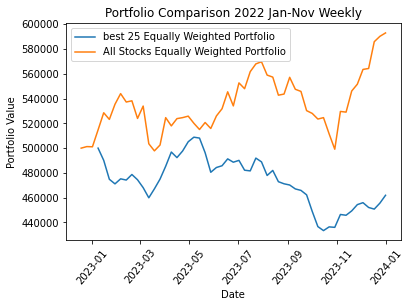

In [97]:
plt.plot(equally_weighted.index, equally_weighted['Portfolio'], label = 'best 25 Equally Weighted Portfolio')
plt.plot(all_equally_weighted.index, all_equally_weighted['Portfolio'], label = 'All Stocks Equally Weighted Portfolio')

#create appropriate titles and label
plt.title('Portfolio Comparison 2022 Jan-Nov Weekly')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

# Rotate x-axes by 50 degrees
plt.xticks(rotation=50)

#plot legend
plt.legend()

The graph above compares the total portfolio value with the top 25 stocks equally weighted versus the total portfolio value with all the stocks equally weighted from January to November 2022, if the csv file “Tickers_Example” was used to run our code. The top 25 stocks were determined using the same strategy to determine the safest portfolio.  Although both portfolio values follow a similar trend, the portfolio value with the top 25 stocks that are weighted equally fluctuates closer to the starting portfolio value of 500,000 dollars than the other portfolio. This is because the portfolio with all the stocks contains stocks that have high beta and standard deviation values which contributes to a riskier portfolio with more volatile stocks. This also suggests that the portfolio that experiences less fluctuation in total value is the safer portfolio as it contains the stocks with the lowest beta and standard deviation values out of all the stocks in the original csv file. Additionally, the difference between the starting portfolio value and ending portfolio value for the portfolio with 25 stocks is much less than the difference for the portfolio with all the stocks. 


In [98]:
#function consumes an indicator and graphs a scatter plot for both final portfolio and not final portfolio's ticker's indicator
def graph_stat (str_indicator):
    plt.scatter(ticker_stats['ticker'], ticker_stats[str_indicator], label=('tickers not in final portfolio'))
    plt.scatter(final_stats['ticker'], final_stats[str_indicator], label=('tickers in final portfolio'))

    #create appropriate titles and label
    plt.title(str_indicator + ' of tickers')
    plt.xlabel('Ticker')
    plt.ylabel(str_indicator)

    plt.axhline(y=final_stats[str_indicator].mean(), linestyle = "-", color = 'tab:orange')
    plt.axhline(y=ticker_stats[str_indicator].mean(), linestyle = "-", color = 'b')

    # Rotate x-axes by 50 degrees
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', which='major', labelsize=7)
    plt.legend()
    plt.show()


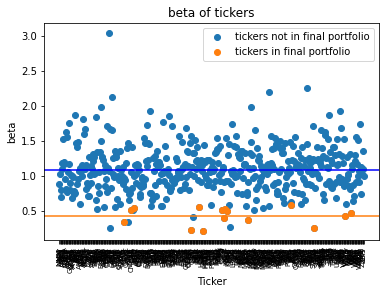

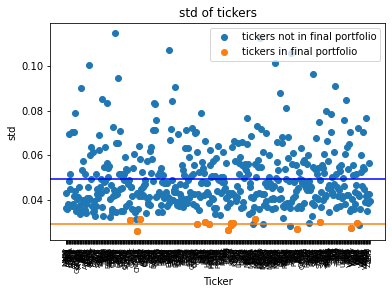

In [99]:
graph_stat('beta')
graph_stat('std')

The above graphs show a clear distribution of the standard deviation and beta for the individual stocks of the portfolio created after the ranking system as well as before the ranking system. 

For the beta values of the tickers, you can see that the average, indicated by the blue line is around 1, which means that the stocks in the original portfolio's average flucutates very closely with the US market (S&P 500). Meanwhile all stocks chosen for the final portfolio, highlighted with orange, is below 1, with an average close to 0.75, which means it fluctuautes less than the market fluctuation, and also lower even after taking consideration for both standard deviation and beta.

Similarly the standard deviation is also lower than the average of the original portfolio, where we can see that the standard deviationi is less than 0.04, meaning the rate of return has standard deviation less than 4%. This will be able to guarantee that our final generated portfolio will not have extreme fluctuations. 

## Final Discussion

In summary, the three measures we used to build our safe portfolio with the maximum number of stocks possible are **beta**, which is a measurement of systematic risk, **standard deviation**, which is a measurement of the total risk of our portfolio’s expected return, and **correlation**, which is a measurement of how closely the returns of each security are related to each other. Although these three measures can provide us with a good indication of our total portfolio risk, there are some **limitations** to each of these methods of determining portfolio risk. For instance, beta is calculated based on historical data, so it is harder to predict how a stock will perform in the future since volatile stocks can fluctuate significantly over the years. However, these three measures of risk are more effective when used together to determine the safest portfolio that can be generated from the list of tickers given. 



### Step 7: Generate Final Portfolio
Based on the optimal weightings calculated in the step 6, we were able to generate our final portfolio as a dataframe called “Portfolio_Final” which contains the tickers, prices, number of shares, total value, and weightings. 


In [100]:
# Generate the Portfolio_Final dataframe from the average
Portfolio_Final = average[['Ticker', 'Shares', 'Value', 'Weight']]

# Readjust the index of the dataframe
Portfolio_Final = Portfolio_Final.reset_index(drop=True)
Portfolio_Final.index = np.arange(1, len(Portfolio_Final) + 1)

# print the dataframe Portfolio_final
Portfolio_Final

,Ticker,Shares,Value,Weight
1,HRL,766.259245,36185.045401,0.072370
2,GIS,403.885522,31958.631369,0.063917
3,VZ,1033.484224,36355.558595,0.072711
4,JNJ,190.422119,32509.582027,0.065019
5,CL,378.463806,27992.014336,0.055984
6,K,487.931015,31518.522478,0.063037
7,SJM,228.471362,33244.758536,0.066490
8,CHD,432.305589,33600.990821,0.067202
9,WMT,705.085067,35182.398370,0.070365
10,KMB,227.905465,29105.370262,0.058211


In [101]:
#print and round to three decimal places
print('The total portfolio weighting adds to: '+ str(round((Portfolio_Final.Weight.sum()*100),3)) + '%')
print('The total value of the portfolio is : $' + str((round((Portfolio_Final.Value.sum()),3))))

The total portfolio weighting adds to: 100.0%
The total value of the portfolio is : $500000.0


In [102]:
Stocks_Final = Portfolio_Final[['Ticker', 'Shares']]
Stocks_Final.index = np.arange(1, len(Stocks_Final) + 1)
Stocks_Final

,Ticker,Shares
1,HRL,766.259245
2,GIS,403.885522
3,VZ,1033.484224
4,JNJ,190.422119
5,CL,378.463806
6,K,487.931015
7,SJM,228.471362
8,CHD,432.305589
9,WMT,705.085067
10,KMB,227.905465


In [103]:
Stocks_Final.to_csv('Stocks_Group_04.csv')

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

James, Cherry, Cloris